In [ ]:
import numpy as np
import pandas as pd


data=pd.read_csv("/content/data.csv",encoding='unicode_escape')
data.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [ ]:
data=data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5836 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5836 non-null   object
 1   Sentiment  5836 non-null   object
dtypes: object(2)
memory usage: 136.8+ KB


In [ ]:

#labeling target variable
dict_label= {'positive': 0, 'neutral': 0 , 'negative': 1}
data.Sentiment = data.Sentiment.map(dict_label)

In [ ]:
data.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,0
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",1
2,"For the last quarter of 2010 , Componenta 's n...",0
3,According to the Finnish-Russian Chamber of Co...,0
4,The Swedish buyout firm has sold its remaining...,0


In [ ]:
from keras.preprocessing import text
tokenizer=text.Tokenizer()
tokenizer.fit_on_texts(list(data.Sentence))
tokenized_text=tokenizer.texts_to_sequences(data.Sentence)

In [ ]:
#padding
from keras.utils import pad_sequences
X=pad_sequences(tokenized_text,maxlen=200)

In [ ]:
tokenizer.word_index

In [ ]:
len(tokenizer.word_index)

11546

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,data['Sentiment'].values, test_size=0.10, random_state=42)

In [ ]:
X_train.shape,y_train.shape

((5252, 200), (5252,))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, SimpleRNN,Dropout

In [ ]:
model=Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1,output_dim=128))
model.add(SimpleRNN(70))
model.add(Dropout(0.5))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 128)         1478016   
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 70)                13930     
                                                                 
 dropout_6 (Dropout)         (None, 70)                0         
                                                                 
 dense_10 (Dense)            (None, 20)                1420      
                                                                 
 dropout_7 (Dropout)         (None, 20)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1,493,387
Trainable params: 1,493,387
No

In [ ]:
history=model.fit(X_train,y_train,batch_size=128,epochs=20,verbose=2,validation_data=(X_test,y_test ))

Epoch 1/20
42/42 - 9s - loss: 0.4888 - accuracy: 0.8277 - val_loss: 0.4152 - val_accuracy: 0.8613 - 9s/epoch - 221ms/step
Epoch 2/20
42/42 - 7s - loss: 0.4341 - accuracy: 0.8462 - val_loss: 0.3885 - val_accuracy: 0.8613 - 7s/epoch - 175ms/step
Epoch 3/20
42/42 - 7s - loss: 0.3588 - accuracy: 0.8540 - val_loss: 0.3852 - val_accuracy: 0.8527 - 7s/epoch - 174ms/step
Epoch 4/20
42/42 - 7s - loss: 0.2822 - accuracy: 0.8711 - val_loss: 0.4192 - val_accuracy: 0.8236 - 7s/epoch - 170ms/step
Epoch 5/20
42/42 - 7s - loss: 0.2203 - accuracy: 0.8837 - val_loss: 0.4725 - val_accuracy: 0.8031 - 7s/epoch - 174ms/step
Epoch 6/20
42/42 - 7s - loss: 0.1927 - accuracy: 0.9006 - val_loss: 0.5548 - val_accuracy: 0.8134 - 7s/epoch - 170ms/step
Epoch 7/20
42/42 - 7s - loss: 0.1718 - accuracy: 0.9025 - val_loss: 0.6233 - val_accuracy: 0.8082 - 7s/epoch - 175ms/step
Epoch 8/20
42/42 - 7s - loss: 0.1623 - accuracy: 0.9025 - val_loss: 0.7098 - val_accuracy: 0.8048 - 7s/epoch - 173ms/step
Epoch 9/20
42/42 - 8s - 

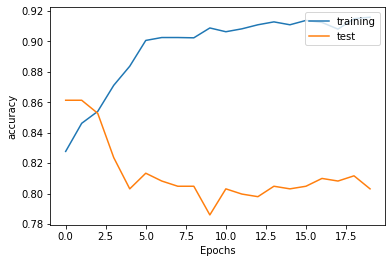

In [ ]:

import matplotlib.pyplot as plt
metrics='accuracy'
plt.plot(history.history[metrics])
plt.plot(history.history['val_'+ metrics])
plt.xlabel('Epochs')
plt.ylabel(metrics)
plt.legend(['training', 'test'], loc='upper right')
plt.show()
     